In [4]:
import cv2
import numpy as np
import os

In [44]:
#读取图片
img = cv2.imread('datas/39.tiff')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV', hsv)
lower_red = np.array([10, 70, 70])
upper_red = np.array([255, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red) #lower20===>0,upper200==>0,
#保存
cv2.imwrite('result/39.tiff', mask)

True

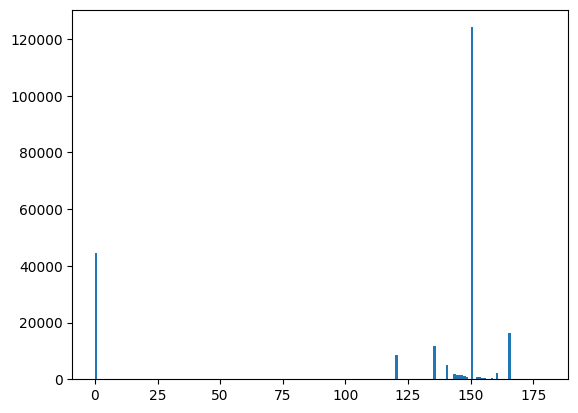

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#通过OpenCV读取图片信息
img = cv2.imread('data/1.tiff')
# BGR图转为HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 提取hsv中H通道数据
h = hsv[:, :, 0].ravel()
# 直方图显示
plt.hist(h, 180, [0, 180])
plt.show()


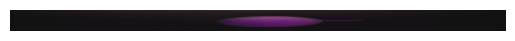

In [77]:
#亮度增强
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# 打开图像
image = Image.open('data/new/yellow/1.tiff')

# 亮度增强
enhancer = ImageEnhance.Brightness(image)
enhanced_image = enhancer.enhance(3)  # 可以尝试不同的值以找到最佳效果

# 显示图像
plt.imshow(enhanced_image)
plt.axis('off')  # 关闭坐标轴
plt.show()

# 如有需要，保存增强后的图像
enhanced_image.save('enhanced_image.png')


In [78]:
import cv2
import numpy as np

#通过OpenCV读取图片信息
img = cv2.imread('enhanced_image.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("img", img)

# HSV 的下界限
lower_red = np.array([133,50,50])
# HSV 的上界限
upper_red = np.array([179,255,255])

# 通过上下限提取范围内的掩模mask
mask = cv2.inRange(hsv, lower_red, upper_red)
cv2.imshow("mask", mask)

# 腐蚀与膨胀处理
# 定义
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2, 2))#定义结构元素的形状和大小

openingmask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel) # 闭运算
openingmask1 = cv2.morphologyEx(openingmask, cv2.MORPH_OPEN,kernel) # 开运算
cv2.imshow('mask',openingmask)
cv2.imshow('mask1',openingmask1)

cv2.waitKey(0)
cv2.destroyAllWindows()


# 找出所有白色连通区域
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(openingmask1, 4, cv2.CV_32S)

# 遍历所有连通区域，移除面积小于特定阈值的区域
area_threshold = 10  # 可以根据实际情况调整阈值大小
for i in range(1, num_labels):  # 标签0是背景
    if stats[i, cv2.CC_STAT_AREA] < area_threshold:
        openingmask1[labels == i] = 0

# 保存和显示处理后的掩膜
cv2.imwrite('cleaned_mask.png', openingmask1)
cv2.imshow('Cleaned Mask', openingmask1)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [95]:
#白色颜色带处理

import cv2
import numpy as np

# 加载图像
mask_path = 'mask1/new/empty/yellow/mask_1.png'




# 边缘去除函数
def remove_edge_bands(mask, edge_threshold=10):
    h, w = mask.shape[:2]

    # 去除上下边缘区域
    mask[:edge_threshold, :] = 0
    mask[h-edge_threshold:, :] = 0

    return mask

# 应用边缘去除
cleaned_mask = remove_edge_bands(mask)

# 保存处理后的图像
output_path = '测试.png'
cv2.imwrite(output_path, cleaned_mask)
# 显示处理后的图像
cv2.imshow('Cleaned Mask ', cleaned_mask)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [70]:
#实现利用hsv空间进行阈值分割，要求hsv三个值做成滑动轴可拖动的实时显示当前阈值分割效果，并且显示当前hsv三个的具体值，

import cv2
import numpy as np

def nothing(x):
    pass

# 创建一个窗口
cv2.namedWindow('HSV Thresholding')

# 创建滑动条，用于调整HSV阈值
cv2.createTrackbar('H Lower', 'HSV Thresholding', 0, 179, nothing)
cv2.createTrackbar('H Upper', 'HSV Thresholding', 179, 179, nothing)
cv2.createTrackbar('S Lower', 'HSV Thresholding', 0, 255, nothing)
cv2.createTrackbar('S Upper', 'HSV Thresholding', 255, 255, nothing)
cv2.createTrackbar('V Lower', 'HSV Thresholding', 0, 255, nothing)
cv2.createTrackbar('V Upper', 'HSV Thresholding', 255, 255, nothing)

# 读取图像
image = cv2.imread('enhanced_image.png')

# 将BGR图像转换为HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

while True:
    # 获取滑动条的当前位置
    h_lower = cv2.getTrackbarPos('H Lower', 'HSV Thresholding')
    h_upper = cv2.getTrackbarPos('H Upper', 'HSV Thresholding')
    s_lower = cv2.getTrackbarPos('S Lower', 'HSV Thresholding')
    s_upper = cv2.getTrackbarPos('S Upper', 'HSV Thresholding')
    v_lower = cv2.getTrackbarPos('V Lower', 'HSV Thresholding')
    v_upper = cv2.getTrackbarPos('V Upper', 'HSV Thresholding')

    # 创建HSV阈值掩膜
    lower_bound = np.array([h_lower, s_lower, v_lower])
    upper_bound = np.array([h_upper, s_upper, v_upper])
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # 对图像应用掩膜以获取结果
    result = cv2.bitwise_and(image, image, mask=mask)

    # 显示图像
    cv2.imshow('HSV Thresholding', result)

    # 打印当前HSV阈值
    print(f"H: ({h_lower}, {h_upper}), S: ({s_lower}, {s_upper}), V: ({v_lower}, {v_upper})")

    # 按'q'键退出循环
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 销毁所有窗口
cv2.destroyAllWindows()


H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179), S: (0, 255), V: (0, 255)
H: (0, 179),

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'HSV Thresholding' in function 'cvGetTrackbarPos'


In [28]:
##循环提取mask

# 指定文件夹路径
folder_path = 'tcimage'  # 替换成你的文件夹路径

# 获取文件夹中的所有文件
files = os.listdir(folder_path)

for file_name in files:
    file_path = os.path.join(folder_path,file_name)

    img = cv2.imread(file_path)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # cv2.imshow("img", img)

    # HSV 的下界限
    lower_red = np.array([160,70,15])
    # HSV 的上界限
    upper_red = np.array([179,255,255])

    # 通过上下限提取范围内的掩模mask
    mask = cv2.inRange(hsv, lower_red, upper_red)
    # cv2.imshow("mask", mask)
    
    # 腐蚀与膨胀处理
    
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3, 3))#定义结构元素的形状和大小
    openingmask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel) # 闭运算
    openingmask1 = cv2.morphologyEx(openingmask, cv2.MORPH_OPEN,kernel) # 开运算
    
    # cv2.imshow('mask',openingmask)
    # cv2.imshow('mask1',openingmask1)
    # 
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    Img_Name = "./mask/" + file_name 
    cv2.imwrite(Img_Name, openingmask1)



In [57]:
 #先增强图像亮度，然后循环提取并保存mask（20240318版无锡透射百香果）ps:目前参数适用于old文件夹内图像，new文件夹内图像需要调整参数

import cv2
import numpy as np
import os
from PIL import Image, ImageEnhance

# 消除边缘区域条状白色色带，实现仅包含中心果子区域为白色目标区域
# 边缘去除函数
def remove_edge_bands(mask, edge_threshold=8):
    h, w = mask.shape[:2]

    # 去除上下边缘区域
    mask[:edge_threshold+6, :] = 0
    mask[h-edge_threshold:, :] = 0

    return mask




# 设定输入和输出文件夹路径
input_folder_path = 'data/new/green'  # 替换为tiff图像的文件夹路径
output_folder_path = 'mask/new/green'  # 替换为保存mask的文件夹路径

# 检查输出文件夹是否存在，如果不存在就创建它
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# 遍历指定文件夹内的所有tiff文件
for file_name in os.listdir(input_folder_path):
    if file_name.endswith('.tiff'):
        # 构建完整的文件路径
        file_path = os.path.join(input_folder_path, file_name)

        # 打开并增强图像亮度
        image = Image.open(file_path)
        enhancer = ImageEnhance.Brightness(image)
        enhanced_image = enhancer.enhance(3.5)  # 增强亮度
        
        # 将PIL图像转换为opencv图像
        img = np.array(enhanced_image)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # 转换到HSV空间
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # 设置HSV阈值
        lower_red = np.array([133, 40, 43])
        upper_red = np.array([179, 255, 255])

        # 提取掩膜
        mask = cv2.inRange(hsv, lower_red, upper_red)

        # 腐蚀与膨胀处理
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
        openingmask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # 闭运算
        openingmask1 = cv2.morphologyEx(openingmask, cv2.MORPH_OPEN, kernel)  # 开运算

        # 连通区域处理
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(openingmask1, 4, cv2.CV_32S)
        area_threshold = 30
        for i in range(1, num_labels):  # 标签0是背景
            if stats[i, cv2.CC_STAT_AREA] < area_threshold:
                openingmask1[labels == i] = 0
        
        # 应用边缘去除
        cleaned_mask = remove_edge_bands(openingmask1)
        
        # 生成输出文件名和路径
        output_file_name = 'mask_' + os.path.splitext(file_name)[0] + '.png'
        output_file_path = os.path.join(output_folder_path, output_file_name)

        # 保存处理后的掩膜
        cv2.imwrite(output_file_path, cleaned_mask)

print("处理完成，掩膜图像已保存到指定文件夹。")

###原条光黄果p110顶端少1像素宽度图像，原因在于后续图像过窄，目前参数已是最优解，选择手动替换p110

处理完成，掩膜图像已保存到指定文件夹。


In [101]:
 #先增强图像亮度，然后循环提取并保存mask（20240318版无锡透射百香果）ps:new文件夹内

import cv2
import numpy as np
import os
from PIL import Image, ImageEnhance

# 消除边缘区域条状白色色带，实现仅包含中心果子区域为白色目标区域
# 边缘去除函数
def remove_edge_bands(mask, edge_threshold=2):
    h, w = mask.shape[:2]

    # 去除上下边缘区域
    mask[:edge_threshold+18, :] = 0
    mask[h-edge_threshold:, :] = 0

    return mask




# 设定输入和输出文件夹路径
input_folder_path = 'data/new/yellow'  # 替换为tiff图像的文件夹路径
output_folder_path = 'mask/new/yellow'  # 替换为保存mask的文件夹路径

# 检查输出文件夹是否存在，如果不存在就创建它
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# 遍历指定文件夹内的所有tiff文件
for file_name in os.listdir(input_folder_path):
    if file_name.endswith('.tiff'):
        # 构建完整的文件路径
        file_path = os.path.join(input_folder_path, file_name)

        # 打开并增强图像亮度
        image = Image.open(file_path)
        enhancer = ImageEnhance.Brightness(image)
        enhanced_image = enhancer.enhance(3)  # 增强亮度
        
        # 将PIL图像转换为opencv图像
        img = np.array(enhanced_image)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # 转换到HSV空间
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # 设置HSV阈值
        lower_red = np.array([133, 50, 50])
        upper_red = np.array([179, 255, 255])

        # 提取掩膜
        mask = cv2.inRange(hsv, lower_red, upper_red)

        # 腐蚀与膨胀处理
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
        openingmask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # 闭运算
        openingmask1 = cv2.morphologyEx(openingmask, cv2.MORPH_OPEN, kernel)  # 开运算

        # 连通区域处理
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(openingmask1, 4, cv2.CV_32S)
        area_threshold = 30
        for i in range(1, num_labels):  # 标签0是背景
            if stats[i, cv2.CC_STAT_AREA] < area_threshold:
                openingmask1[labels == i] = 0
        
        # 应用边缘去除
        cleaned_mask = remove_edge_bands(openingmask1)
        
        # 生成输出文件名和路径
        output_file_name = 'mask_' + os.path.splitext(file_name)[0] + '.png'
        output_file_path = os.path.join(output_folder_path, output_file_name)

        # 保存处理后的掩膜
        cv2.imwrite(output_file_path, cleaned_mask)

print("处理完成，掩膜图像已保存到指定文件夹。")

###new当前参数黄果p62顶部白色区域过大，当前参数下其他图像效果较好，选择手动替换p62，针对new下的yellow和green此时边缘参数宽度为5，上边缘+7，下边缘+5
###对于new下empty内的yellow，边缘参数宽度为2，上边缘+3，下边缘+2,P1和p30效果不好，p1上边缘没有去除干净，p30上边缘去除过多，选择手动替换

处理完成，掩膜图像已保存到指定文件夹。
